<a href="https://colab.research.google.com/github/ShubhrajitS/DefectDetection/blob/main/Defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ShubhrajitS/DefectDetection  # clones a repository from git hub

Cloning into 'DefectDetection'...
remote: Enumerating objects: 998, done.
remote: Counting objects: 100% (998/998), done.
remote: Compressing objects: 100% (997/997), done.
remote: Total 998 (delta 0), reused 993 (delta 0), pack-reused 0
Receiving objects: 100% (998/998), 60.59 MiB | 43.11 MiB/s, done.


In [ ]:
!ls DefectDetection            # creates a list of files present in the path

# print(np.shape(a))
# print(a)


Annotation.csv	images


In [ ]:
import os
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import cv2
import pandas as pd
import ntpath
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

In [ ]:
!pip3 install imgaug

In [ ]:
np.random.seed(0)

In [ ]:
datadir = 'DefectDetection'
columns = ['image_name','defect']
data =pd.read_csv(os.path.join(datadir,'Annotation.csv'),names = columns)
data.head()


,image_name,defect
0,0.png,0
1,1.png,0
2,2.png,0
3,3.png,0
4,4.png,0


In [ ]:
y_train = data['defect']
y_train = np.array(y_train)
y_train = to_categorical(y_train,2)
print(y_train.shape)

(989, 2)


[836 153]


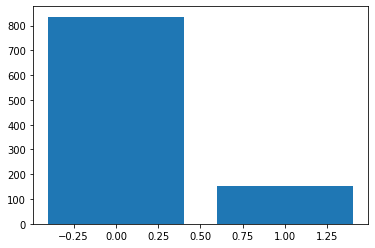

In [ ]:
hist, bins = np.histogram(data['defect'], bins=2)
x= np.array([0,1])
plt.bar(x,hist)
print(hist)
# take helo from traffic data

989
['DefectDetection/images/000.png', 'DefectDetection/images/001.png', 'DefectDetection/images/002.png', 'DefectDetection/images/003.png', 'DefectDetection/images/004.png', 'DefectDetection/images/005.png', 'DefectDetection/images/006.png', 'DefectDetection/images/007.png', 'DefectDetection/images/008.png', 'DefectDetection/images/009.png', 'DefectDetection/images/010.png', 'DefectDetection/images/011.png', 'DefectDetection/images/012.png', 'DefectDetection/images/013.png', 'DefectDetection/images/014.png', 'DefectDetection/images/015.png', 'DefectDetection/images/016.png', 'DefectDetection/images/017.png', 'DefectDetection/images/018.png', 'DefectDetection/images/019.png', 'DefectDetection/images/020.png', 'DefectDetection/images/021.png', 'DefectDetection/images/022.png', 'DefectDetection/images/023.png', 'DefectDetection/images/024.png', 'DefectDetection/images/025.png', 'DefectDetection/images/026.png', 'DefectDetection/images/027.png', 'DefectDetection/images/028.png', 'DefectDe

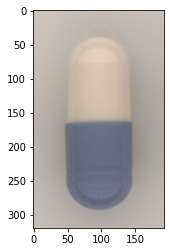

In [ ]:

X_train=[]
# img_path = 'DefectDetection/images/001.png'
for i in range(10):
    image_path = datadir + '/images/00'+str(i)+'.png'
    X_train.append(image_path)

for i in range(10,100):
  image_path = datadir + '/images/0'+str(i)+'.png'
  X_train.append(image_path)

for i in range(100,836):
  image_path = datadir + '/images/'+str(i)+'.png'
  X_train.append(image_path)

for i in range(1000,1153):
  image_path = datadir + '/images/'+str(i)+'.png'
  X_train.append(image_path)

image = mpimg.imread(X_train[153])
plt.imshow(image)
print(len(X_train))
print(X_train)
print(image.shape)

In [ ]:

X_train_matrix = np.empty((989,320,192,3))
for i in range(len(X_train)):
  X_train_matrix[i,:,:,:] = mpimg.imread(X_train[i])

print(X_train_matrix.shape)


(989, 320, 192, 3)


In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Convolution2D(30, (5,5), input_shape = (320,192,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(15,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size= (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation = 'softmax'))

  model.compile(Adam(lr=0.01), loss= 'binary_crossentropy', metrics= ['accuracy'])
  return model


In [ ]:

model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 316, 188, 30)      2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 94, 30)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 92, 15)       4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 46, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53820)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               26910500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# define lenet model

In [ ]:
# fit model

history =  model.fit(X_train_matrix, y_train, epochs =10,batch_size = 10, verbose =1, shuffle =1  )

Epoch 1/10
99/99 [==============================] - 89s 889ms/step - loss: 1.5346 - accuracy: 0.8392
Epoch 2/10
99/99 [==============================] - 87s 883ms/step - loss: 0.4378 - accuracy: 0.8453
Epoch 3/10
99/99 [==============================] - 87s 883ms/step - loss: 0.4372 - accuracy: 0.8453
Epoch 4/10
99/99 [==============================] - 88s 885ms/step - loss: 0.4376 - accuracy: 0.8453
Epoch 5/10
99/99 [==============================] - 87s 884ms/step - loss: 0.4360 - accuracy: 0.8453
Epoch 6/10
99/99 [==============================] - 87s 882ms/step - loss: 0.4406 - accuracy: 0.8453
Epoch 7/10
99/99 [==============================] - 87s 880ms/step - loss: 0.4401 - accuracy: 0.8453
Epoch 8/10
99/99 [==============================] - 87s 881ms/step - loss: 0.4361 - accuracy: 0.8453
Epoch 9/10
99/99 [==============================] - 87s 879ms/step - loss: 0.4380 - accuracy: 0.8453
Epoch 10/10
99/99 [==============================] - 87s 878ms/step - loss: 0.4376 - accura

In [ ]:
X_test =  mpimg.imread(X_train[100])
X_test = X_test.reshape(1,320,192,3)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

print(classes_x)

[0]


In [ ]:
model.save('Defect_model.h5')

In [ ]:
from google.colab import files
files.download('Defect_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>